# FaceRecognition

In [61]:
import face_recognition
import cv2
import numpy as np
from pathlib import Path
from PIL import Image
import matplotlib.pyplot as plt
from matplotlib import gridspec


In [41]:
file_name = '20130529_01_Driv_009_f .jpg'
image_folder = Path('DrivFace/DrivImages/')
image_file = image_folder / file_name

## Extract faces via HoGs and CNNs from color images

In [42]:
image = face_recognition.load_image_file(image_file, mode='RGB')
face_location = face_recognition.face_locations(image, model='hog')
face_location_cnn = face_recognition.face_locations(image, model='cnn')

In [43]:
pil_image = Image.fromarray(image)
top, right, bottom, left = face_location[0]
pil_image_face = Image.fromarray(image[top:bottom, left:right])
top, right, bottom, left = face_location_cnn[0]
pil_image_face_cnn = Image.fromarray(image[top:bottom, left:right])

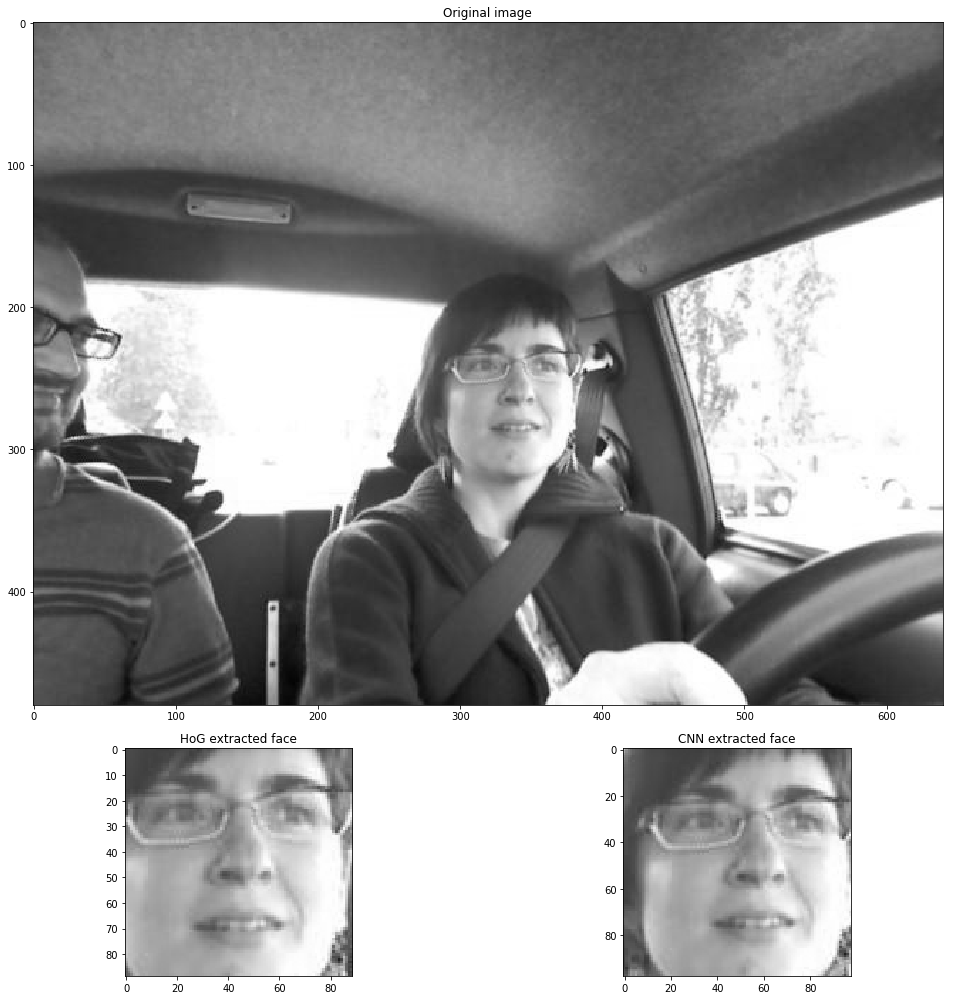

In [83]:
fig = plt.figure(figsize=(12, 12)) 
gs = gridspec.GridSpec(2, 2, height_ratios=[3, 1])

ax0 = fig.add_subplot(gs[0,:])
ax0.imshow(pil_image)
ax0.set_title('Original image')

ax2 = fig.add_subplot(gs[1,0])
ax2.imshow(pil_image_face)
ax2.set_title('HoG extracted face')

ax3 = fig.add_subplot(gs[1,1])
ax3.imshow(pil_image_face_cnn)
ax3.set_title('CNN extracted face')

plt.tight_layout()
plt.show()

## Extract faces via HoGs and CNNs from B/W images

In [67]:
image = face_recognition.load_image_file(image_file, mode='L')
face_location = face_recognition.face_locations(image, model='hog')
face_location_cnn = face_recognition.face_locations(image, model='cnn')

In [68]:
pil_image = Image.fromarray(image)
top, right, bottom, left = face_location[0]
pil_image_face = Image.fromarray(image[top:bottom, left:right])
top, right, bottom, left = face_location_cnn[0]
pil_image_face_cnn = Image.fromarray(image[top:bottom, left:right])

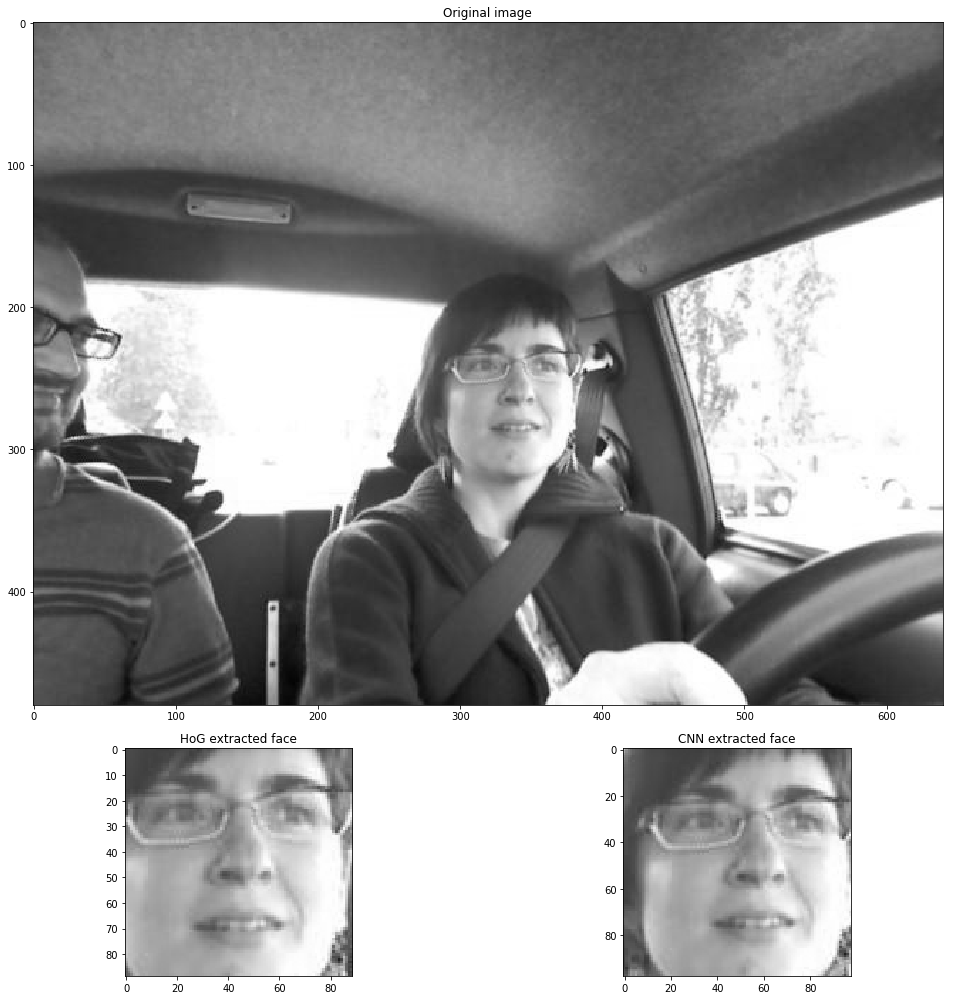

In [82]:
fig = plt.figure(figsize=(12, 12)) 
gs = gridspec.GridSpec(2, 2, height_ratios=[3, 1])

ax0 = fig.add_subplot(gs[0,:])
ax0.imshow(pil_image)
ax0.set_title('Original image')

ax2 = fig.add_subplot(gs[1,0])
ax2.imshow(pil_image_face)
ax2.set_title('HoG extracted face')

ax3 = fig.add_subplot(gs[1,1])
ax3.imshow(pil_image_face_cnn)
ax3.set_title('CNN extracted face')

plt.tight_layout()
plt.show()

# Contrast adaption

In [161]:
image = cv2.imread(str(image_file), cv2.IMREAD_GRAYSCALE)

hist = cv2.calcHist([image], [0], None, [256], [0,256])
hist /= np.sum(hist)
cum_hist = np.cumsum(hist)

percentile_5 = np.argmin(np.abs(cum_hist-0.05))
percentile_95 = np.argmin(np.abs(cum_hist-0.90))

a = 255/(percentile_95-percentile_5)
b = -a*percentile_5
image_adapted = np.clip(a*image+b, 0, 255).astype(np.uint8)

ada_hist = cv2.calcHist([image_adapted], [0], None, [256], [0,256])
ada_hist /= np.sum(ada_hist)
ada_cum_hist = np.cumsum(ada_hist)

Text(0.5,1,'Adapted cumulative histogram')

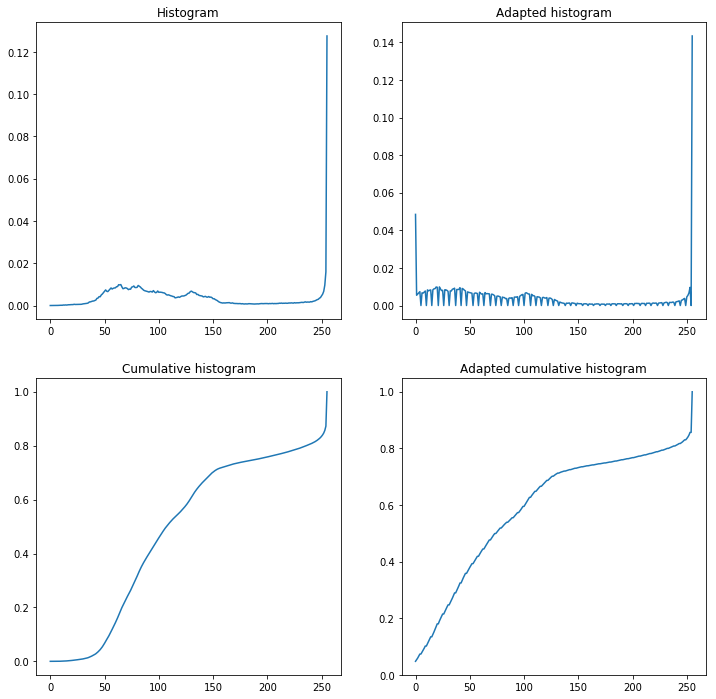

In [168]:
fig, ax = plt.subplots(2,2,figsize=(12, 12))

ax[0,0].plot(hist)
ax[0,0].set_title('Histogram')
ax[1,0].plot(cum_hist)
ax[1,0].set_title('Cumulative histogram')
ax[0,1].plot(ada_hist)
ax[0,1].set_title('Adapted histogram')
ax[1,1].plot(ada_cum_hist)
ax[1,1].set_title('Adapted cumulative histogram')

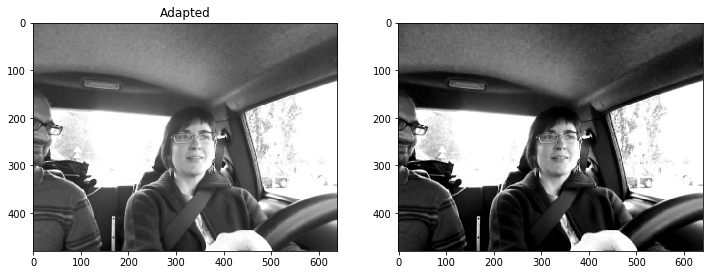

In [169]:
fig, ax = plt.subplots(1,2,figsize=(12, 12))

ax[0].imshow(image, cmap='gray')
ax[0].set_title('Original')
ax[1].imshow(image_adapted, cmap='gray')
ax[0].set_title('Adapted')
plt.show()